In [1]:
import pandas as pd
train = pd.read_csv(r'C:\Users\User\Desktop\Data mining\train.csv', index_col='Unnamed: 0')
y = pd.read_csv(r'C:\Users\User\Desktop\Data mining\train_answers.csv', index_col='Unnamed: 0')
test = pd.read_csv(r'C:\Users\User\Desktop\Data mining\test.csv', index_col='Unnamed: 0')
answer = pd.read_csv(r'C:\Users\User\Desktop\Data mining\real_answers_for_test.csv', index_col='Unnamed: 0')

Closest centroids for the first 3 examples
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)
--------------------------------------------------
Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


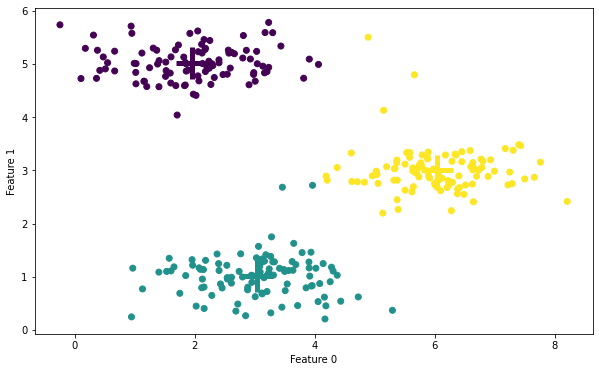

In [3]:
from scipy.io import loadmat # импортируем библиотеки
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist 
import os 


data2 = loadmat(r'C:\Users\User\Desktop\Data mining\ex7data2.mat') #
X = data2['X'] 
centroids = np.array([[3, 3],[6, 2],[8, 5]]) 
max_iter = 10 


def find(x, centroids): # создаем функцию
    distances = cdist(x, centroids) # рассчитываем cosine distance с помощью функций cdist
    points = np.array([np.argmin(i) for i in distances]) # берем индексы самых минимальных элементов в листах которые в листе distances
    return points


def compute(x, idx, k): # создаем функцию
    centroids=[]
    for i in range(k): # создаем луп чтобы поделить данные на 3 класса
        temp_cent = x[idx==i].mean(axis=0) # обновляем центроид с помощью среднего значения кластера, которому он принадлежит
        centroids.append(temp_cent)
    return centroids


idx_start = find(X, centroids) # самый первый idx
centroids_start = compute(X, idx_start, 3) # самый первый centroids


for i in range(max_iter):# вызываем и повторяем действий функций 10 раз
    idx = find(X, centroids)
    centroids = compute(X, idx, 3)


centroids = np.array(centroids)
centroids_start = np.array(centroids_start)
print('Closest centroids for the first 3 examples') 
print(idx_start[:3])
print('(the closest centroids should be 0, 2, 1 respectively)') 
print('-'*50) 


print('Centroids computed after initial finding of closest centroids:') 
print(centroids_start)


fig = plt.figure(figsize=(10,6)) # рисуем рисунок
plt.scatter(X[:, 0], X[:, 1], c=idx) 
plt.scatter(centroids[:, 0], centroids[:, 1], c=[0, 1, 2], marker="+", s=1000, linewidth=5) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")
plt.show();